In [1]:
import numpy as np
import os
import platform
import cv2
import matplotlib.pyplot as plt
import time

## Database Dir

In [2]:
slash = '\\' if platform.system() == 'Windows' else '/'

Destination  = f'.{slash}Output'
Input_images = f'.{slash}Database'
if not os.path.exists(Destination):
    os.makedirs(Destination)

## Used functions

In [3]:
def image2double(img):
    if (img.dtype != np.uint8):
        raise ValueError("ValueError exception thrown!\n \
                         \r\tInput img should be of dtype uint8.")
    return img.astype(float) / (np.iinfo(img.dtype).max - np.iinfo(img.dtype).min)
def image2uint8(img):
    if (img.dtype != float):
        raise ValueError("ValueError exception thrown!\n \
                         \r\tInput img should be of dtype float.")
    return (255*img).astype(np.uint8)

def display_images(img_fullname, img, img_reconstructed, psnr):
    h, w =  img.shape
    if (w < 250):
        h = h * 250//w 
        w = 250
        img = cv2.resize(img, dsize=(h, w))
        img_reconstructed = cv2.resize(img_reconstructed, dsize=(h, w))
    font = cv2.FONT_HERSHEY_SIMPLEX
    title_img = np.ones((30, 2*w+90))
    title_img =  cv2.putText(title_img, 'Original Image', (80, 20), font, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
    title_img_names = cv2.putText(title_img, 'Reconstructed Image', (2*w+90-245, 20), font, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
    title_img_psnr = cv2.putText(np.ones((30, 2*w+90)), f'PSNR: {psnr}', (20, 20), font, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
    
    img_or = np.concatenate((
                    np.concatenate((np.ones((h, 20)), img), axis=1), 
                    np.ones((h, 50)), 
                    np.concatenate((img_reconstructed, np.ones((h, 20))), axis=1)
                    ), 
                    axis=1
                    )
    
    img_or_t = np.concatenate((
                    title_img_names,
                    img_or,
                    title_img_psnr
                ),
                axis=0
            )
    
    plt.imshow(img_or_t, cmap='gray')
    plt.show()
    time.sleep(1)


## Database

In [4]:
# resize images to N x N
N = 50
print('Creating Database')
DB = []
DB_img_sizes = []
img_fullnames = os.listdir(Input_images)
for img_fullname in img_fullnames:
    img_itr = cv2.imread(f'{Input_images}{slash}{img_fullname}', cv2.IMREAD_GRAYSCALE)
    DB_img_sizes.append(img_itr.shape)
    img_itr = image2double(cv2.resize(img_itr, dsize=(N, N)))
    DB.append(img_itr.T.reshape((-1), ))
DB = np.array(DB)
print()
print(f"There are {len(img_fullnames)} images in the Database each of which has {N*N} pixels, then a variable DB of size [{len(img_fullnames)} x {N*N}] should be reserved.")
print()
print(f"Datebase of size {DB.shape}")
print(DB)

Creating Database

There are 10 images in the Database each of which has 2500 pixels, then a variable DB of size [10 x 2500] should be reserved.

Datebase of size (10, 2500)
[[0.30980392 0.30588235 0.30588235 ... 0.04313725 0.04313725 0.04313725]
 [0.22352941 0.2627451  0.25098039 ... 0.06666667 0.08627451 0.10196078]
 [0.01568627 0.05098039 0.07058824 ... 0.01960784 0.01960784 0.02352941]
 ...
 [0.18431373 0.17647059 0.16078431 ... 0.10196078 0.06666667 0.04313725]
 [0.23921569 0.23921569 0.24313725 ... 0.1372549  0.10980392 0.02745098]
 [0.22745098 0.27843137 0.25490196 ... 0.01568627 0.01568627 0.01960784]]


## Mean of columns in Dataset

In [5]:
# calculate and save mean of columns of DB.
print("Calculating and Saving mean of columns in DB.")
DB_mean = np.mean(DB, axis=0)
print()

print(f"Mean of columns in DB. This vetor has {DB_mean.size} elements")
print(DB_mean)
print()
print("Zero-ing mean of columns in DB")
DB = DB - DB_mean
print("Mean of columns in DB is now zero." \
      if not np.any(np.mean(DB, axis=0)>1e-15) else \
     "There seem to be a problem. please run the code again!")
print()
print("DB:")
print(DB)

Calculating and Saving mean of columns in DB.

Mean of columns in DB. This vetor has 2500 elements
[0.16156863 0.17372549 0.17411765 ... 0.05019608 0.04705882 0.04117647]

Zero-ing mean of columns in DB
Mean of columns in DB is now zero.

DB:
[[ 0.14823529  0.13215686  0.13176471 ... -0.00705882 -0.00392157
   0.00196078]
 [ 0.06196078  0.08901961  0.07686275 ...  0.01647059  0.03921569
   0.06078431]
 [-0.14588235 -0.1227451  -0.10352941 ... -0.03058824 -0.02745098
  -0.01764706]
 ...
 [ 0.0227451   0.0027451  -0.01333333 ...  0.05176471  0.01960784
   0.00196078]
 [ 0.07764706  0.0654902   0.06901961 ...  0.08705882  0.0627451
  -0.01372549]
 [ 0.06588235  0.10470588  0.08078431 ... -0.0345098  -0.03137255
  -0.02156863]]


## Covariance of columns in DB results in a square matrix, in which element (i,j) is the covariance of ith column and jth column in DB.

In [6]:
print("Calculating covariance of columns in DB, to see how they change in regard to one another.\n")
Cov_DB = np.cov(DB.T)
print("Covariance of columns in DB:")
print(f"Shape of covariance of columns in DB is {Cov_DB.shape}")
print(Cov_DB)

Calculating covariance of columns in DB, to see how they change in regard to one another.

Covariance of columns in DB:
Shape of covariance of columns in DB is (2500, 2500)
[[0.00957854 0.00945175 0.00880721 ... 0.00146166 0.00131061 0.00044769]
 [0.00945175 0.00979811 0.00906284 ... 0.00119031 0.00118758 0.0005374 ]
 [0.00880721 0.00906284 0.00852048 ... 0.00107446 0.00111239 0.00048187]
 ...
 [0.00146166 0.00119031 0.00107446 ... 0.00170464 0.00121663 0.00028365]
 [0.00131061 0.00118758 0.00111239 ... 0.00121663 0.00099791 0.00042206]
 [0.00044769 0.0005374  0.00048187 ... 0.00028365 0.00042206 0.00071511]]


# Eigen Vectors and Eigen Values

In [7]:
print('Calculating Eigen Vectors and Eigen Values')
[eigenValues, eigenVectors] = np.linalg.eigh(Cov_DB)
print("Sorting eigen vectors by the magnitude of their corresponding eigen value.")
sort_index     = eigenValues.argsort()[::-1] # Descending Order
eigenValues    = eigenValues[sort_index]
eigenVectors   = eigenVectors[:, sort_index]
print()
print(f"Eigen values of size {eigenValues.size}: \n{eigenValues}")
print()
print(f"corresponding eigen vectors of shape {eigenVectors.shape}: \n{eigenVectors}")


Calculating Eigen Vectors and Eigen Values
Sorting eigen vectors by the magnitude of their corresponding eigen value.

Eigen values of size 2500: 
[ 1.62542069e+01  6.76529915e+00  4.29058872e+00 ... -4.98741049e-15
 -7.13088942e-15 -7.70518518e-15]

corresponding eigen vectors of shape (2500, 2500): 
[[-1.28569409e-02  2.08157241e-02  6.00767923e-03 ...  5.37552478e-03
  -1.41481562e-02 -4.57445541e-03]
 [-1.34703386e-02  2.20117475e-02  4.98404751e-03 ... -3.65368667e-01
  -1.26571084e-01 -1.80819014e-01]
 [-1.21558544e-02  2.15718164e-02  5.68185060e-03 ...  1.10673191e-01
   7.41791087e-01  2.64819585e-01]
 ...
 [-1.71818389e-03 -3.48507710e-03  9.49510546e-03 ... -4.56801018e-03
  -1.25752556e-03 -1.66188055e-03]
 [-2.81881837e-03 -1.91370838e-03  6.67889526e-03 ...  2.29234221e-03
  -3.23333721e-03  1.65281548e-04]
 [-2.30626243e-03  5.54487310e-04 -4.71452629e-03 ... -3.88611999e-03
  -1.11163316e-03  5.28303219e-03]]


## A closer look at eigen values

First 15 elements of eigen values:
[1.62542069e+01 6.76529915e+00 4.29058872e+00 3.00136601e+00
 2.08911577e+00 1.82103933e+00 1.54943187e+00 1.11709463e+00
 6.90080874e-01 6.28944387e-15 6.08166446e-15 5.83234464e-15
 4.69624661e-15 3.89834915e-15 3.55619522e-15]
Dividing each eigen value by the next one, to see how each element changes:
[2.40258509e+00 1.57677643e+00 1.42954531e+00 1.43666811e+00
 1.14721068e+00 1.17529487e+00 1.38701935e+00 1.61878799e+00
 1.09720492e+14 1.03416489e+00 1.04274779e+00 1.24191618e+00
 1.20467573e+00 1.09621348e+00 1.13191844e+00]

Maximum change happens after the 9th element of eigen values: 0.6900808739873912


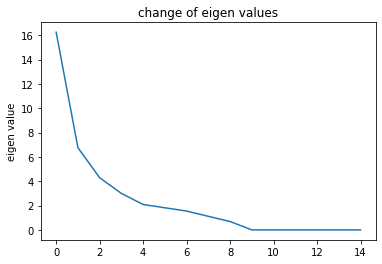

In [8]:
print(f"First 15 elements of eigen values:\n{eigenValues[:15]}")
eigenValues_divide_by_next = np.true_divide(eigenValues[:-1], eigenValues[1:])
print(f"Dividing each eigen value by the next one, to see how each element changes:\n{eigenValues_divide_by_next[:15]}")
print()
print(f"Maximum change happens after the {np.argmax(eigenValues_divide_by_next)+1}th element of eigen values: {eigenValues[np.argmax(eigenValues_divide_by_next)]}")

plt.figure(1)
plt.plot(eigenValues[:15])
plt.ylabel("eigen value")
plt.title("change of eigen values")
plt.show()


## Extraction of Feature Vectors and Feature Values 

In [9]:
featureVectors = eigenVectors[:, :np.argmax(eigenValues_divide_by_next)+1]
featureValues  = eigenValues[:np.argmax(eigenValues_divide_by_next)+1]
print()
print(f"Eigen values that are kept of size {featureValues.size}: \n{featureValues}")
print()
print(f"Corresponding eigen vectors of shape {featureVectors.shape}: \n{featureVectors}")


Eigen values that are kept of size 9: 
[16.25420688  6.76529915  4.29058872  3.00136601  2.08911577  1.82103933
  1.54943187  1.11709463  0.69008087]

Corresponding eigen vectors of shape (2500, 9): 
[[-0.01285694  0.02081572  0.00600768 ...  0.02616912  0.02596023
   0.00764221]
 [-0.01347034  0.02201175  0.00498405 ...  0.02816674  0.02265674
   0.01304099]
 [-0.01215585  0.02157182  0.00568185 ...  0.02637816  0.01947534
   0.01946985]
 ...
 [-0.00171818 -0.00348508  0.00949511 ...  0.01223981 -0.00987655
  -0.00999357]
 [-0.00281882 -0.00191371  0.0066789  ...  0.0043466  -0.00926492
  -0.0013881 ]
 [-0.00230626  0.00055449 -0.00471453 ... -0.00563984 -0.01311995
   0.00390974]]


In [10]:
print(f"DB of shape {DB.shape} is manipulated in way that its unimportant elements are discarded, and then transformed into a new space by multiplying by its essential eigen vectors.")
print()
DB_PCAed = np.matmul(featureVectors.T, DB.T)
print(f"DB after removing it's unimportant vectors: \nshape of new DB is {DB_PCAed.T.shape}\n{DB_PCAed.T}")

DB of shape (10, 2500) is manipulated in way that its unimportant elements are discarded, and then transformed into a new space by multiplying by its essential eigen vectors.

DB after removing it's unimportant vectors: 
shape of new DB is (10, 9)
[[-6.28571875  3.26051487 -1.56370417  1.27530269  1.2966629  -1.53585873
   1.03341403 -0.00686197 -0.36835268]
 [-5.4260059   1.35423192 -0.13420852 -1.56225954 -0.09238082  2.25669227
  -1.59652606 -0.91725952  0.03045844]
 [ 4.59583788  0.23849944  0.05978977  3.37709866  0.56671111  1.86209814
   0.53723065 -0.77229209 -0.38377242]
 [ 3.55964649  2.47876542  0.74544458  0.06224748  1.22041979 -0.19647625
  -1.66686091  1.94221619  0.51026365]
 [ 3.89462969  0.88783266 -0.95207989 -1.02060773 -0.13581256 -1.15163851
   0.28435417 -1.59244644  1.53907955]
 [-1.16371984 -1.44361378  2.03858457  1.57687237 -2.07173033 -1.77003068
  -1.57373931 -0.47096739 -0.4841365 ]
 [-0.61956304 -5.64616299 -3.32045633 -0.10078843  0.95605166 -0.1451371
 

## Reconstruction of images out the lossy compression of DB

In [11]:
DB_Reconstructed = np.matmul(featureVectors, DB_PCAed).T + DB_mean
print(f"Reconstructing DB by again multiplying it by essential eigen vectors to transform it back to the original space.")
print()
print(f"Reconstructed DB of shape {DB_Reconstructed.shape}: \n{DB_Reconstructed}")
print("De-zero-ing mean of the original DB")
DB = DB + DB_mean

Reconstructing DB by again multiplying it by essential eigen vectors to transform it back to the original space.

Reconstructed DB of shape (10, 2500): 
[[0.30980392 0.30588235 0.30588235 ... 0.04313725 0.04313725 0.04313725]
 [0.22352941 0.2627451  0.25098039 ... 0.06666667 0.08627451 0.10196078]
 [0.01568627 0.05098039 0.07058824 ... 0.01960784 0.01960784 0.02352941]
 ...
 [0.18431373 0.17647059 0.16078431 ... 0.10196078 0.06666667 0.04313725]
 [0.23921569 0.23921569 0.24313725 ... 0.1372549  0.10980392 0.02745098]
 [0.22745098 0.27843137 0.25490196 ... 0.01568627 0.01568627 0.01960784]]
De-zero-ing mean of the original DB


## Comparison of the original DB and the reconstructed DB

1.jpg 	psnr:  356.0609952810346


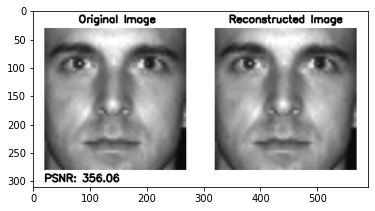

10.jpg 	psnr:  355.8756197714984


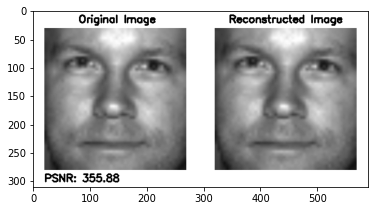

2.jpg 	psnr:  356.1905449932877


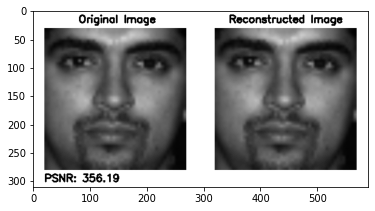

3.jpg 	psnr:  356.27324496297047


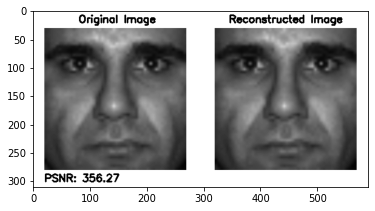

4.jpg 	psnr:  356.4157334334317


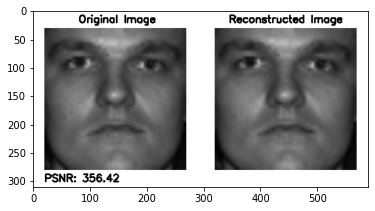

5.jpg 	psnr:  357.1622327137694


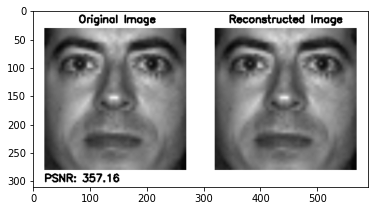

6.jpg 	psnr:  357.15221750373826


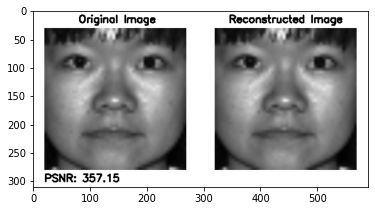

7.jpg 	psnr:  355.3002208683349


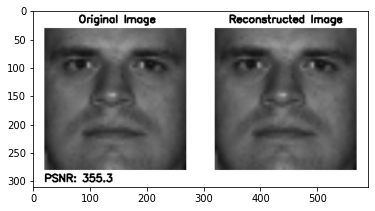

8.jpg 	psnr:  356.64857370011924


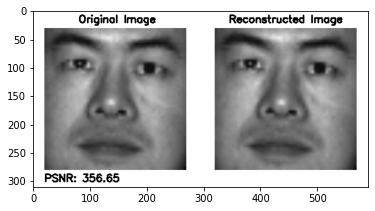

9.jpg 	psnr:  358.12156567943794


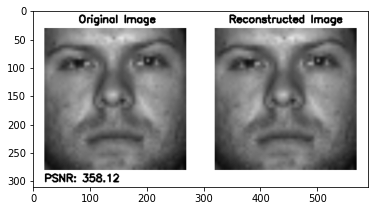

In [12]:
for indx, img_fullname in enumerate(img_fullnames):
    h, w = DB_img_sizes[indx]
    # Original image
    img = np.reshape(DB[indx, :], (N, N)).T
    img = cv2.resize(img, dsize=(h, w))
    # Reconstructed image
    img_reconstructed = np.reshape(DB_Reconstructed[indx, :], (N, N)).T
    img_reconstructed = cv2.resize(img_reconstructed, dsize=(h, w))

    # Calculating psnr, peak signal-to-noise ratio, to have a quantivative comparison of images
    psnr = cv2.PSNR(img, img_reconstructed)
    print(img_fullname, '\tpsnr: ', psnr)

    display_images(img_fullname, img, img_reconstructed, round(psnr, 2))



## What if we intentionally included less eigen vectors and discarded part of the essential data 

Zero-ing mean of the original DB
Manually picking 5 essential eigen vectors for the transformation into a new space.

Eigen values that are kept of size 5: 
[16.25420688  6.76529915  4.29058872  3.00136601  2.08911577]

Corresponding eigen vectors of shape (2500, 5): 
[[-0.01285694  0.02081572  0.00600768 -0.02434839  0.00858651]
 [-0.01347034  0.02201175  0.00498405 -0.02180934 -0.00042649]
 [-0.01215585  0.02157182  0.00568185 -0.01769076  0.0050072 ]
 ...
 [-0.00171818 -0.00348508  0.00949511 -0.01415902  0.00911134]
 [-0.00281882 -0.00191371  0.0066789  -0.01092845  0.00803706]
 [-0.00230626  0.00055449 -0.00471453 -0.00774421  0.00374107]]

DB of shape (10, 2500) is manipulated in way that its unimportant, and in this case partially important, elements are discarded, and then transformed into a new space by multiplying it by the non-discarded eigen vectors.

DB after removing it's unimportant, and in this case partially important, vectors: 
shape of new DB is (10, 5)
[[-6.28571875

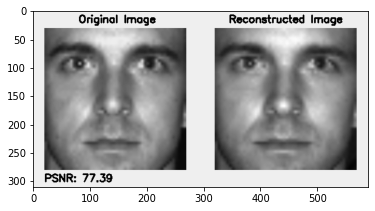

10.jpg 	psnr:  73.7135707207505


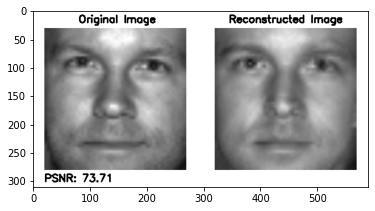

2.jpg 	psnr:  76.49892810892219


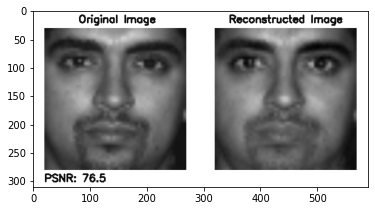

3.jpg 	psnr:  74.66021345489808


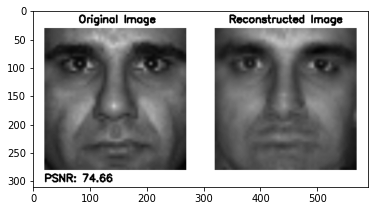

4.jpg 	psnr:  74.90060581377328


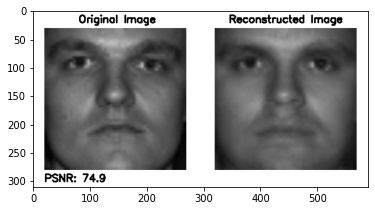

5.jpg 	psnr:  75.26639998466588


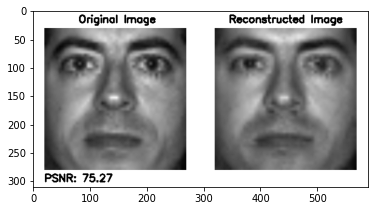

6.jpg 	psnr:  86.40045695380786


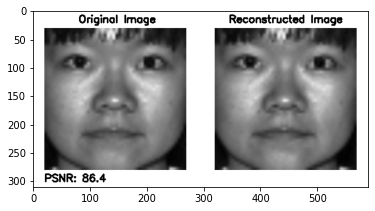

7.jpg 	psnr:  78.03053696606784


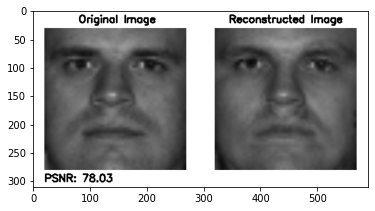

8.jpg 	psnr:  79.52028564747879


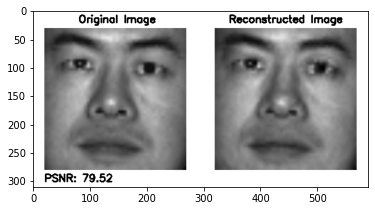

9.jpg 	psnr:  76.3006139563824


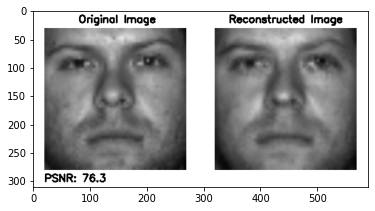

In [ ]:
# zeroing DB again
print("Zero-ing mean of the original DB")
DB = DB - DB_mean

p = 5
print(f"Manually picking {p} essential eigen vectors for the transformation into a new space.")
newFeatureVectors = eigenVectors[:, :p]
newFeatureValues  = eigenValues[:p]
print()
print(f"Eigen values that are kept of size {newFeatureValues.size}: \n{newFeatureValues}")
print()
print(f"Corresponding eigen vectors of shape {newFeatureVectors.shape}: \n{newFeatureVectors}")
print()
print(f"DB of shape {DB.shape} is manipulated in way that its unimportant, and in this case partially important, elements are discarded, and then transformed into a new space by multiplying it by the non-discarded eigen vectors.")
print()
newDB_PCAed = np.matmul(newFeatureVectors.T, DB.T)
print(f"DB after removing it's unimportant, and in this case partially important, vectors: \nshape of new DB is {newDB_PCAed.T.shape}\n{newDB_PCAed.T}")
print()
print(f"Reconstructing DB by again multiplying it by non-discarded eigen vectors to transform it back to the original space.")
newDB_Reconstructed = np.matmul(newFeatureVectors, newDB_PCAed).T + DB_mean
print()
print(f"Reconstructed DB of shape {newDB_Reconstructed.shape}: \n{newDB_Reconstructed}")
print()
print("De-zero-ing mean of the original DB")
DB = DB + DB_mean
print()

for indx, img_fullname in enumerate(img_fullnames):
    h, w = DB_img_sizes[indx]
    # Original image
    img = np.reshape(DB[indx, :], (N, N)).T
    img = cv2.resize(img, dsize=(h, w))
    # Reconstructed image
    img_newReconstructed = np.reshape(newDB_Reconstructed[indx, :], (N, N)).T
    img_newReconstructed = cv2.resize(img_newReconstructed, dsize=(h, w))

    # Calculating psnr, peak signal-to-noise ratio, to have a quantivative comparison of images
    psnr = cv2.PSNR(img, img_newReconstructed)
    print(img_fullname, '\tpsnr: ', psnr)

    display_images(img_fullname, img, img_newReconstructed, round(psnr, 2))
